### Package Versions

- **Python version**: `3.9.13`
- **NumPy version**: `1.23.5`
- **Matplotlib version**: `3.4.2`
- **SciPy version**: `1.9.1`
- **Pandas version**: `1.5.3`

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
from IPython.display import display

### Section a)

In [3]:
# Openening and reading the cars-fixed04.dat files
file_data = None
with open('cars-fixed04.dat', 'r') as file:
    file_data = file.readlines()

data = [line.strip().split(',') for line in file_data]


### converting them to dataframes ###

# selecting model of the cars for data frame's indices
indices = [data[i][0] for i in range(1, len(data))]
# selecting features title for data frame's columns
columns = data[0]
# removing first entry of each car list which is the model of the car
data = [data[i][1:] for i in range(1, len(data))]
# removing empty data which is none
data.pop(196)
indices.pop(196)

df = pd.DataFrame(data, index = indices, columns=columns)


# adjusting the types of data from strings to bool and float
df[df.columns[:7]] = df[df.columns[:7]].astype(int).astype(bool)
df[df.columns[7:]] = df[df.columns[7:]].astype(float)

print('Data frame corresponding to the cars-fixed04.dat file: \n')
pd.set_option('display.max_rows', 12)
display(df)

Data frame corresponding to the cars-fixed04.dat file: 



,Sports,SUV,Wagon,Minivan,Pickup,AWD,RWD,Retail,Dealer,Engine,Cylinders,Horsepower,CityMPG,HighwayMPG,Weight,Wheelbase,Length,Width
Acura 3.5 RL,False,False,False,False,False,False,False,43755.0,39014.0,3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0,72.0
Acura 3.5 RL Navigation,False,False,False,False,False,False,False,46100.0,41100.0,3.5,6.0,225.0,18.0,24.0,3893.0,115.0,197.0,72.0
Acura MDX,False,True,False,False,False,True,False,36945.0,33337.0,3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0,77.0
Acura NSX S,True,False,False,False,False,False,True,89765.0,79978.0,3.2,6.0,290.0,17.0,24.0,3153.0,100.0,174.0,71.0
Acura RSX,False,False,False,False,False,False,False,23820.0,21761.0,2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0,68.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Volvo S80 2.9,False,False,False,False,False,False,False,37730.0,35542.0,2.9,6.0,208.0,20.0,28.0,3576.0,110.0,190.0,72.0
Volvo S80 T6,False,False,False,False,False,False,False,45210.0,42573.0,2.9,6.0,268.0,19.0,26.0,3653.0,110.0,190.0,72.0
Volvo V40,False,False,True,False,False,False,False,26135.0,24641.0,1.9,4.0,170.0,22.0,29.0,2822.0,101.0,180.0,68.0
Volvo XC70,False,False,True,False,False,True,False,35145.0,33112.0,2.5,5.0,208.0,20.0,27.0,3823.0,109.0,186.0,73.0


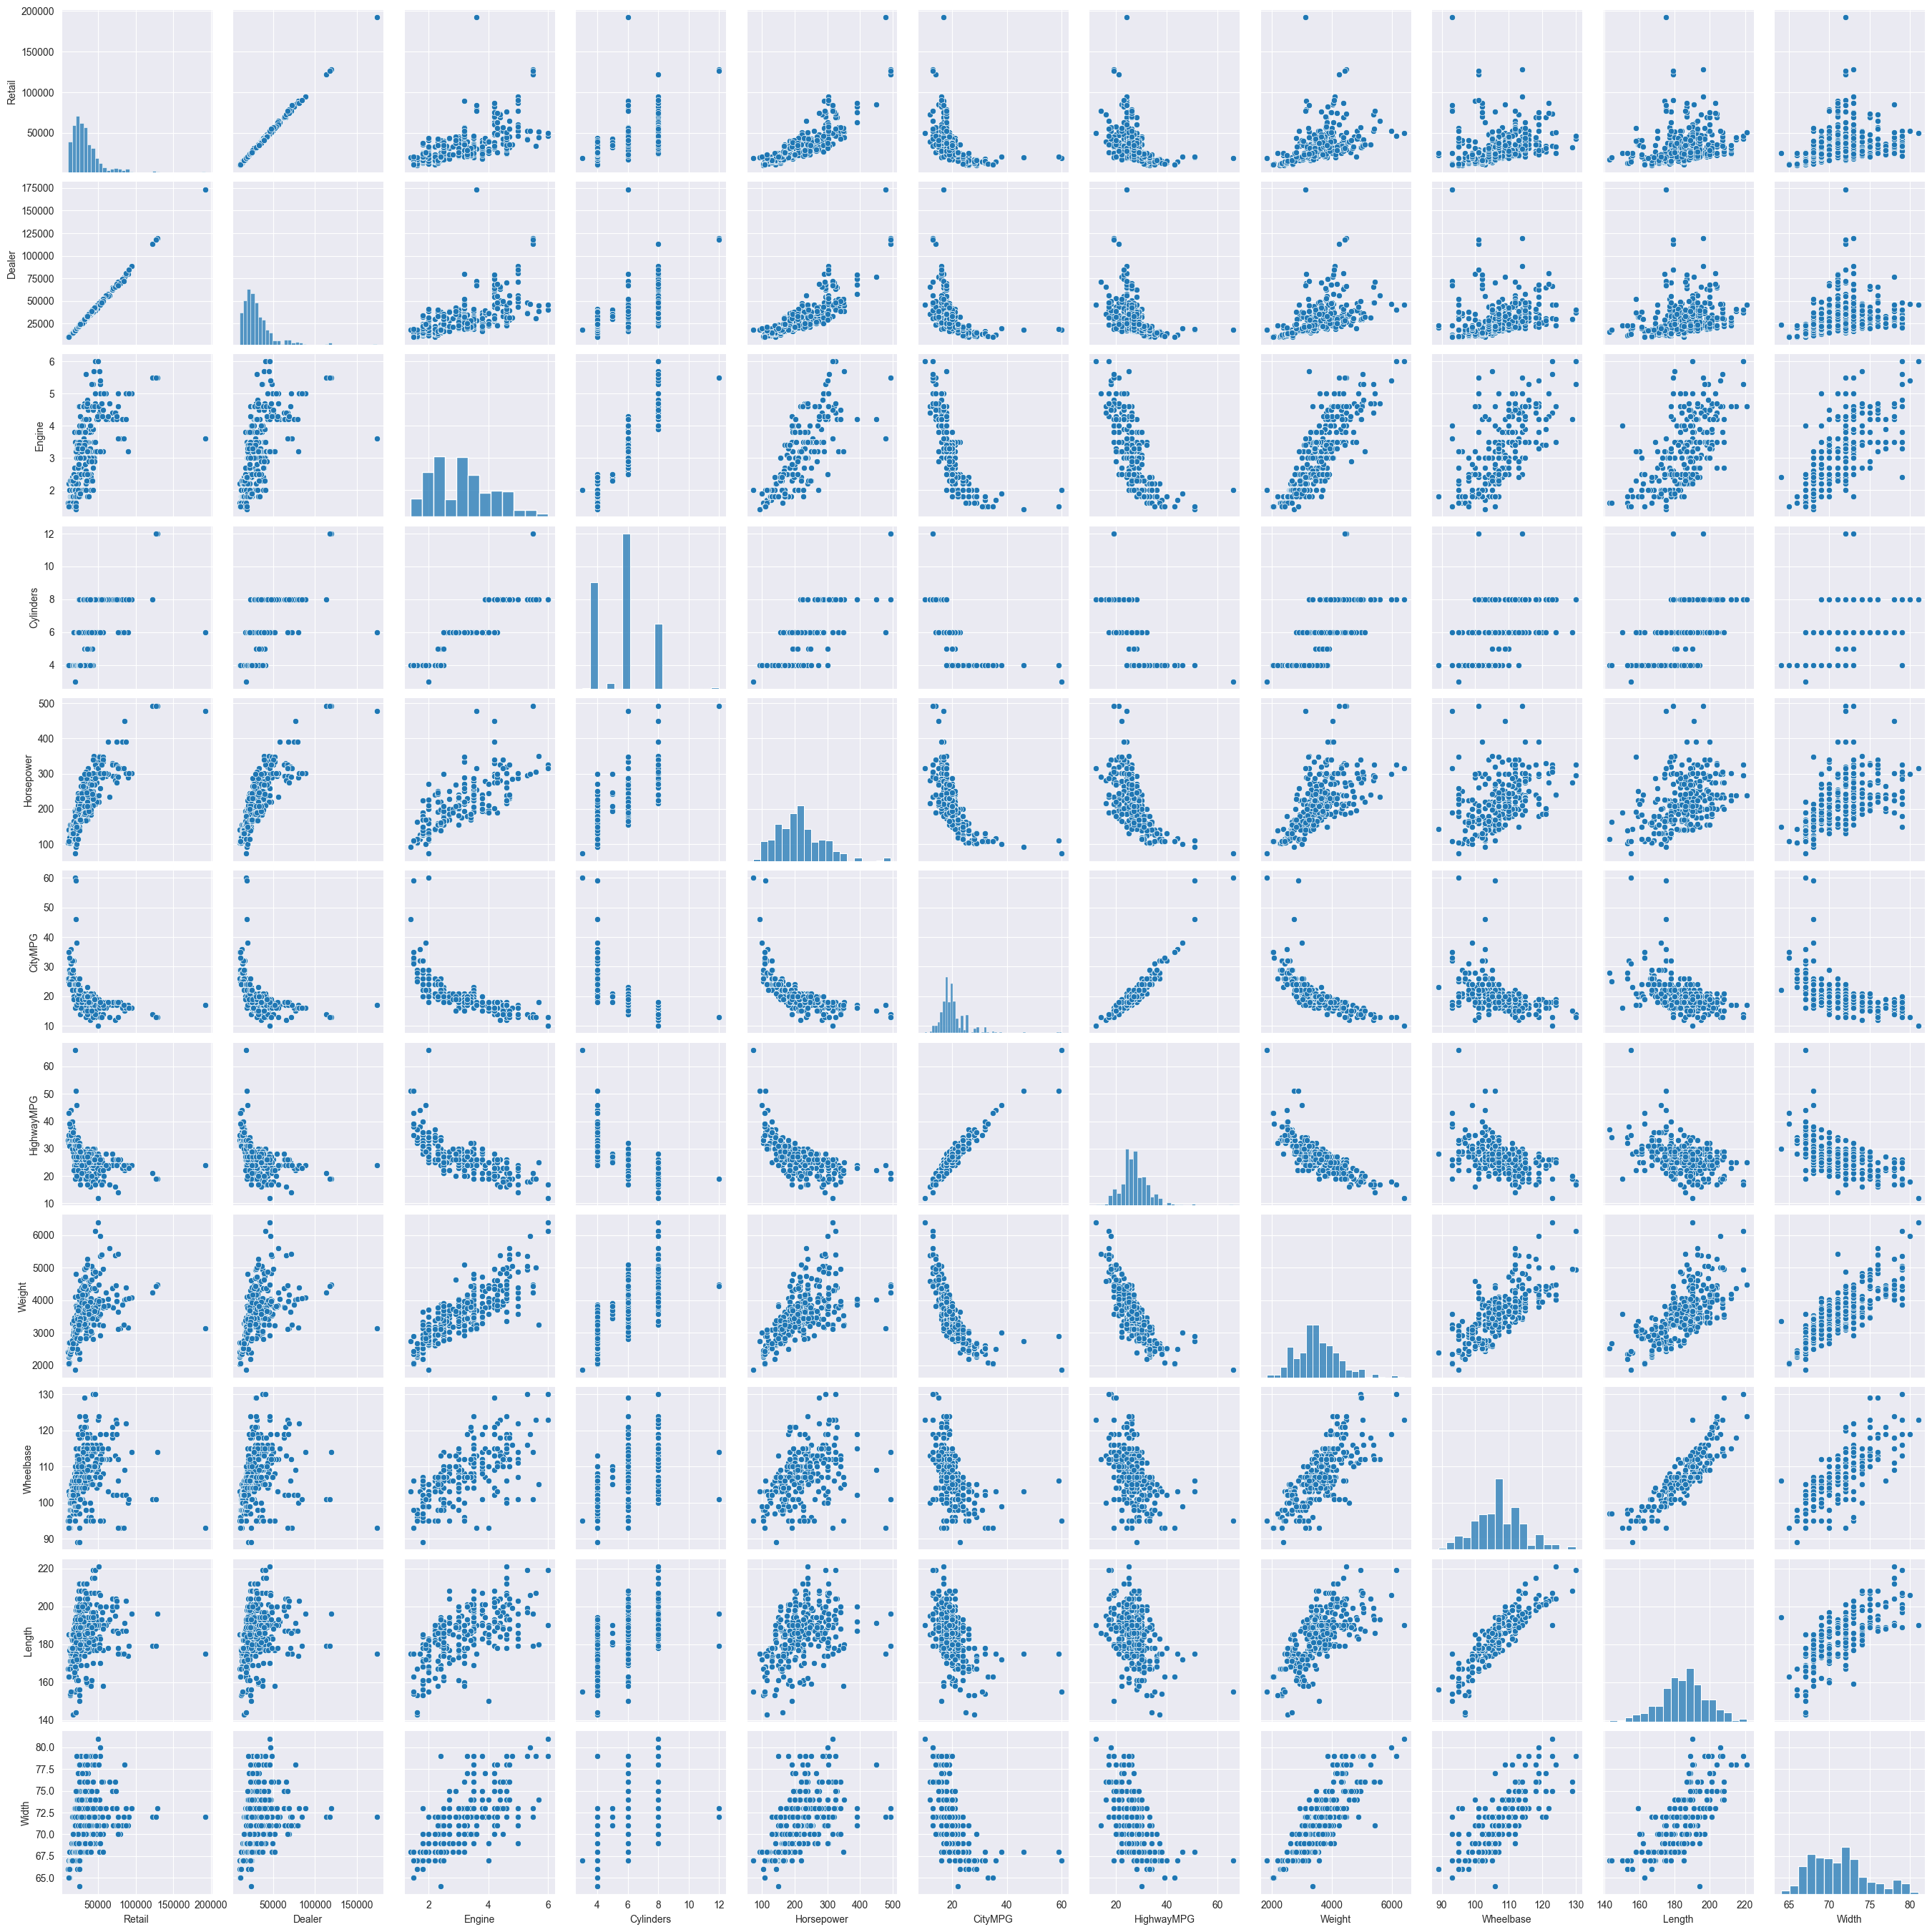

In [4]:

# plotting the pair plot of different features
cols_to_plot = df.columns[7:]
sns.pairplot(df[cols_to_plot], corner=False)
plt.show()

Some of the data features such as "HIGHWAYMPG" and "CITYMPG" are highly correlated. There are some features such as "Cylinders" which are not sensitive to changing other features. We can see that the scale of each feature is different so we need to standardize the dataset first then analyse it.

In [6]:
# Scaling data using StandardScaler class from sklearn.preproccesing 
scaled_data = StandardScaler().fit_transform(np.array(df)[:, 7:])
scaled_df = pd.DataFrame(data = scaled_data, columns=df.columns[7:], index= df.index)

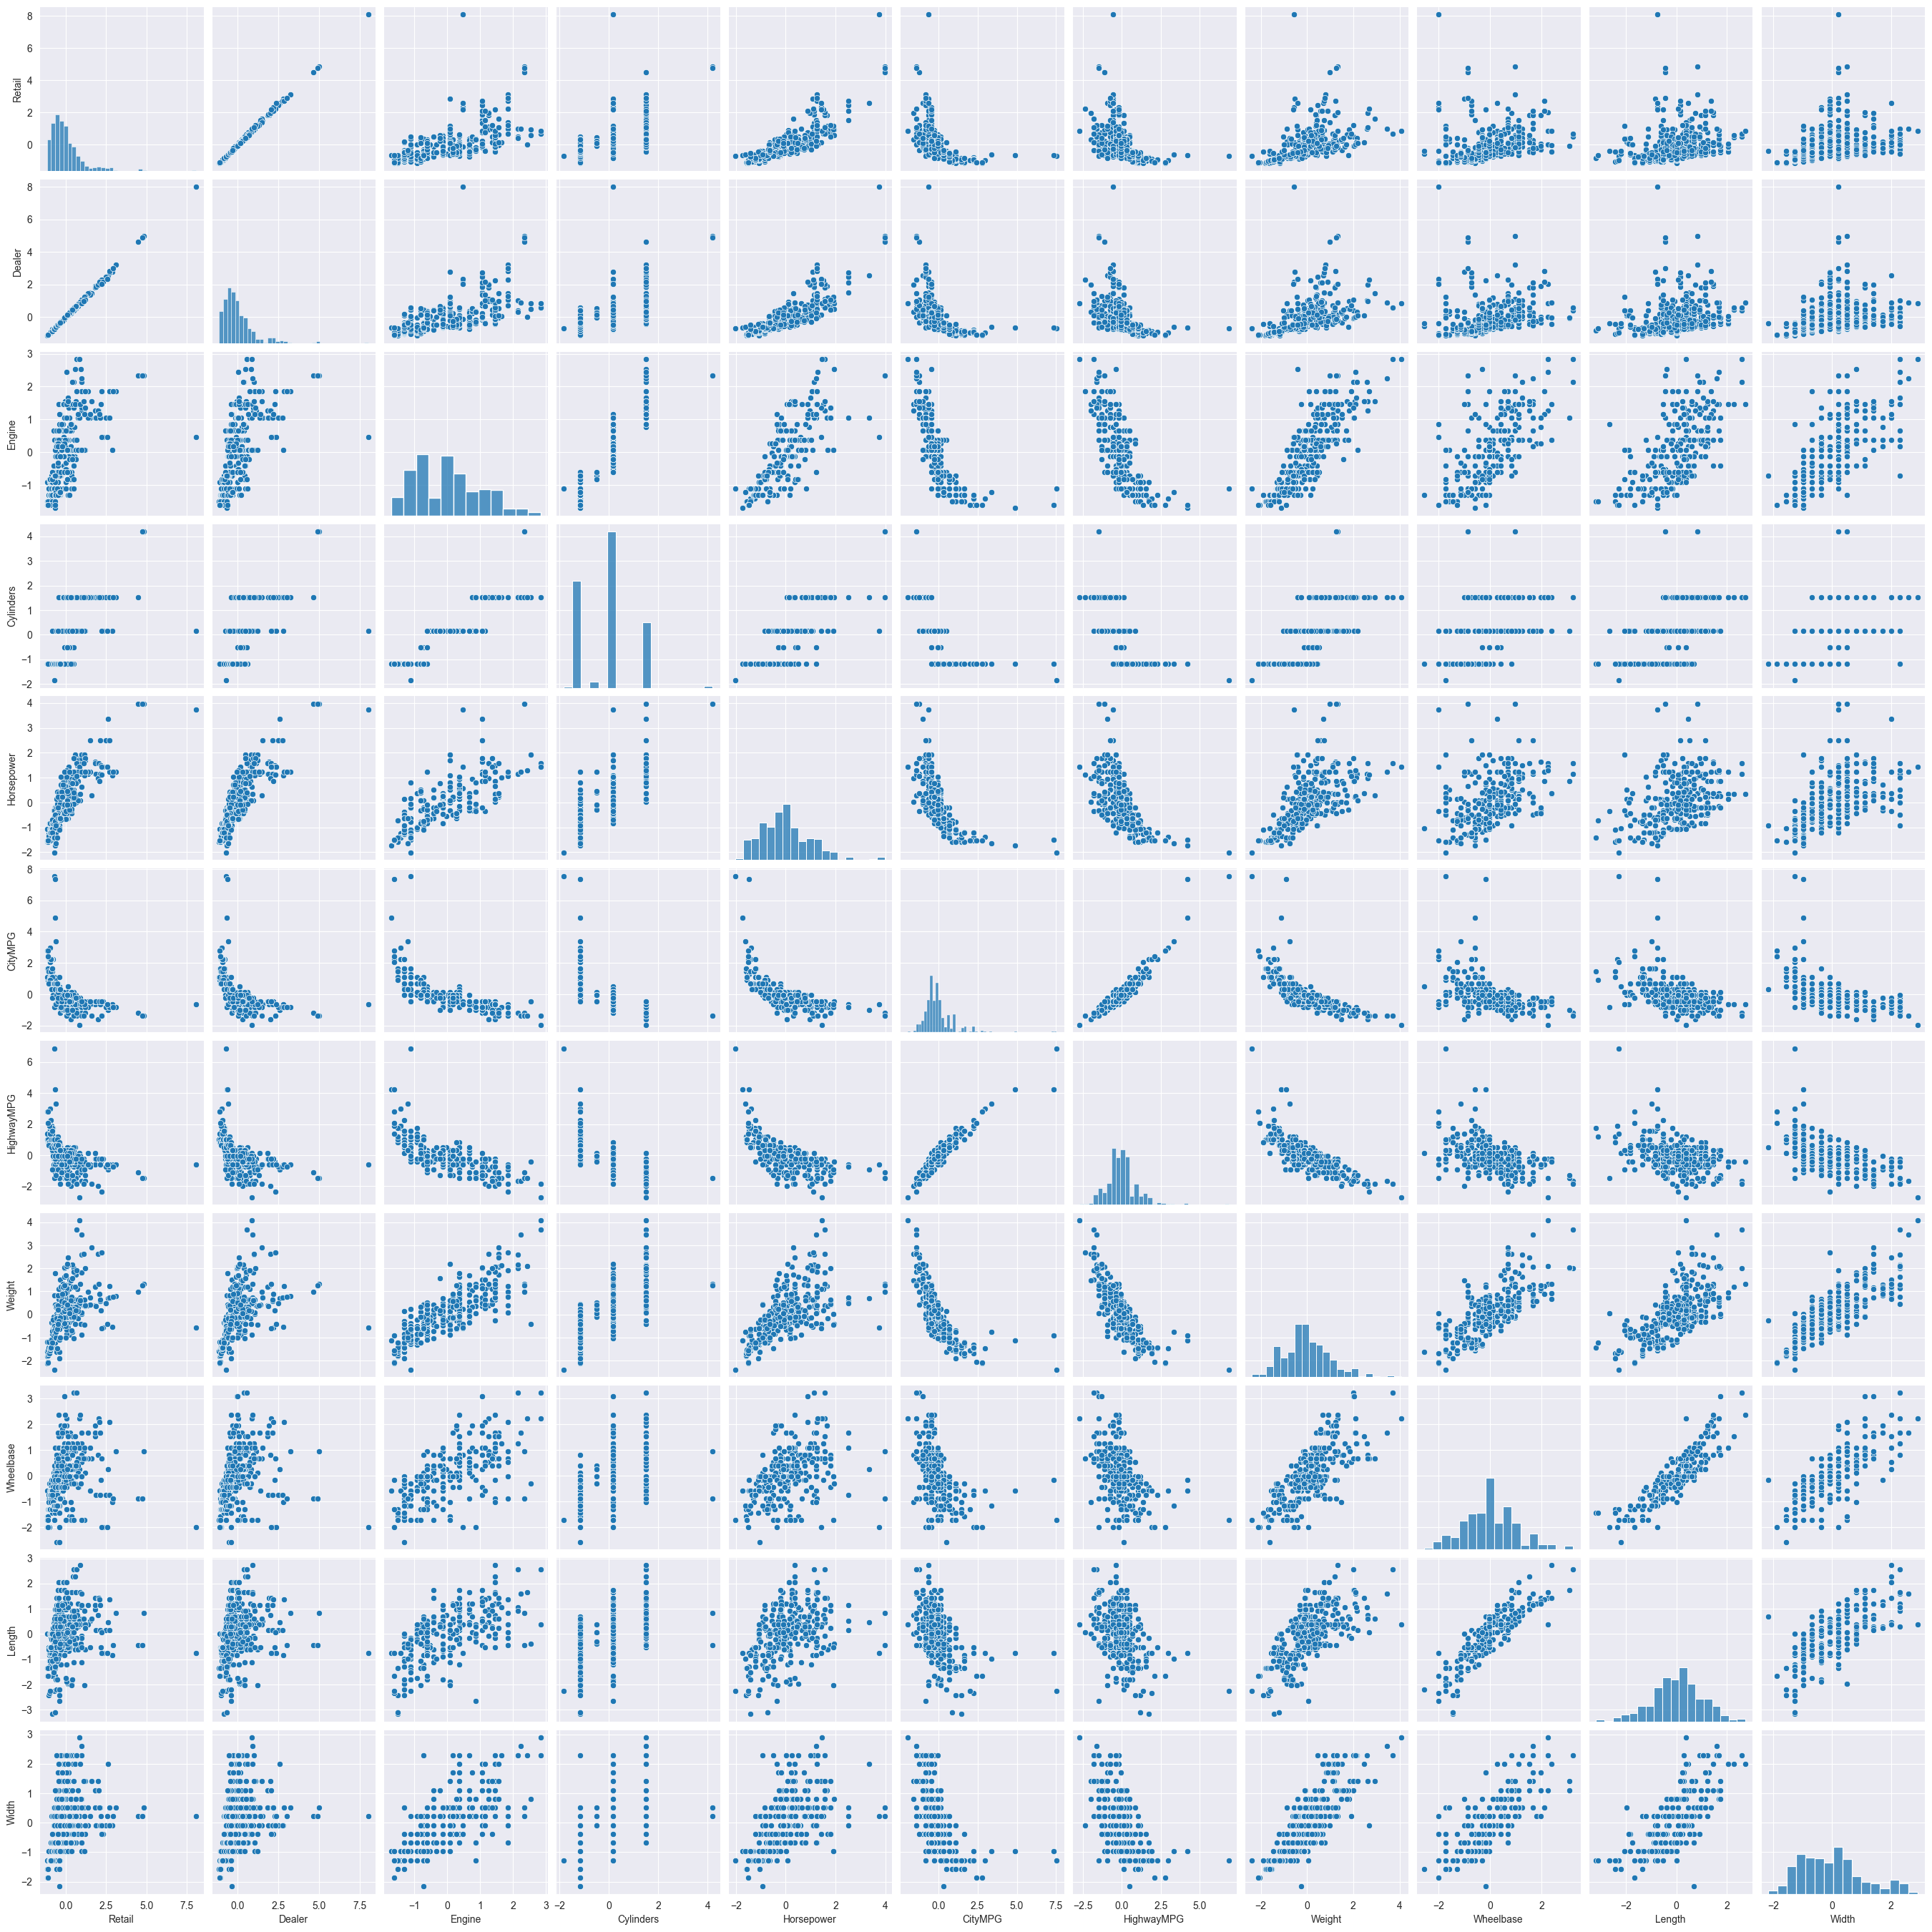

In [7]:

# plotting the pair plot of different features after standardization
sns.pairplot(scaled_df, corner=False)
plt.show()

So now we have same scaling we can compare each features.

# Section b)

First I plot the heatmap of the first dataset to compare it with standardized dataset.

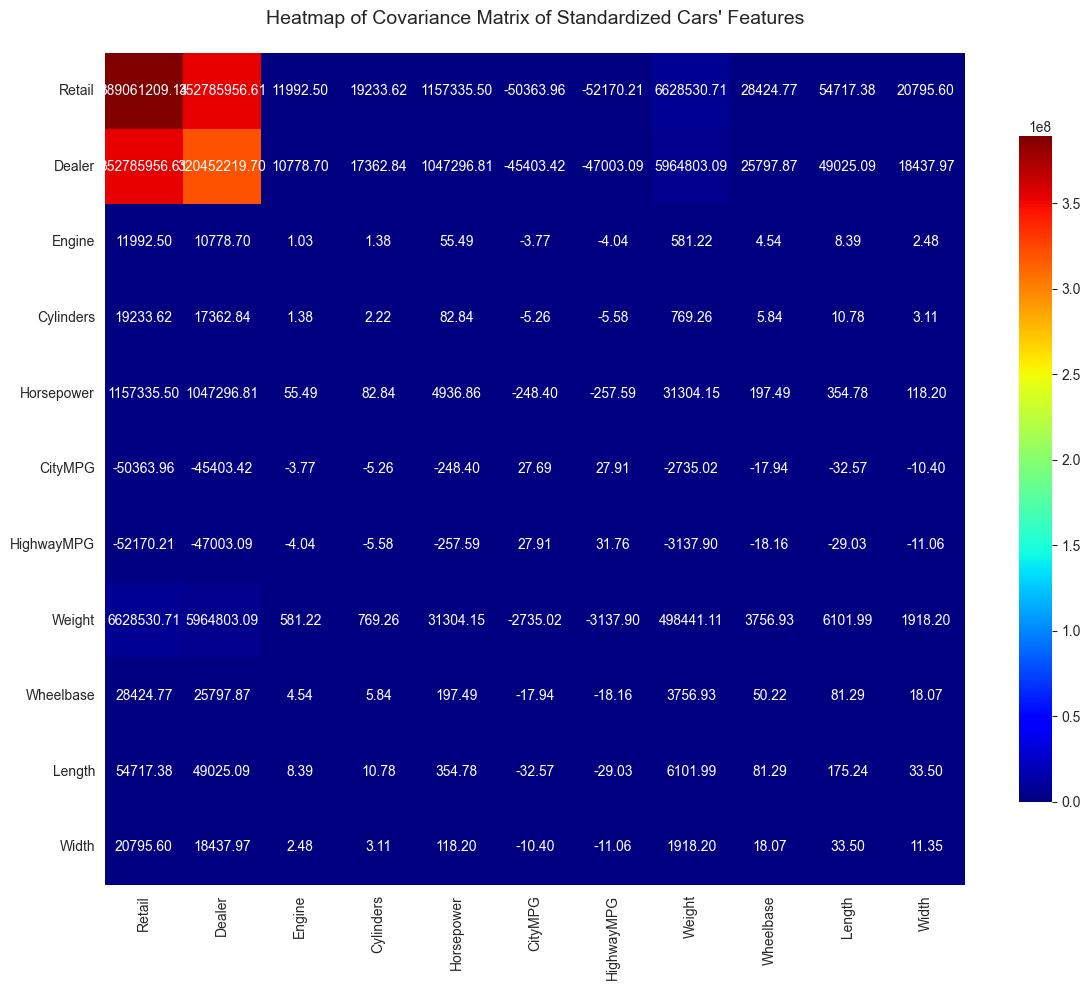

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Adjust the plot size for better readability
plt.figure(figsize=(12, 10))

# Create the heatmap with improved aesthetics
sns.heatmap(
    df[cols_to_plot].cov(),
    annot=True,
    fmt='.2f',
    cmap='jet',
    annot_kws={"size": 10},  # Adjust the font size of the annotations
    cbar_kws={"shrink": 0.8}  # Shrink the color bar for better fit
)

# Add a title with proper spacing
plt.title('Heatmap of Covariance Matrix of Standardized Cars\' Features\n', fontsize=14)

# Use a tight layout to prevent clipping
plt.tight_layout()

plt.show()


As a result is it obvious that the covariance matrix because the features in the beginning don't have same unit doesn't behave well so we need to standardize the data. 

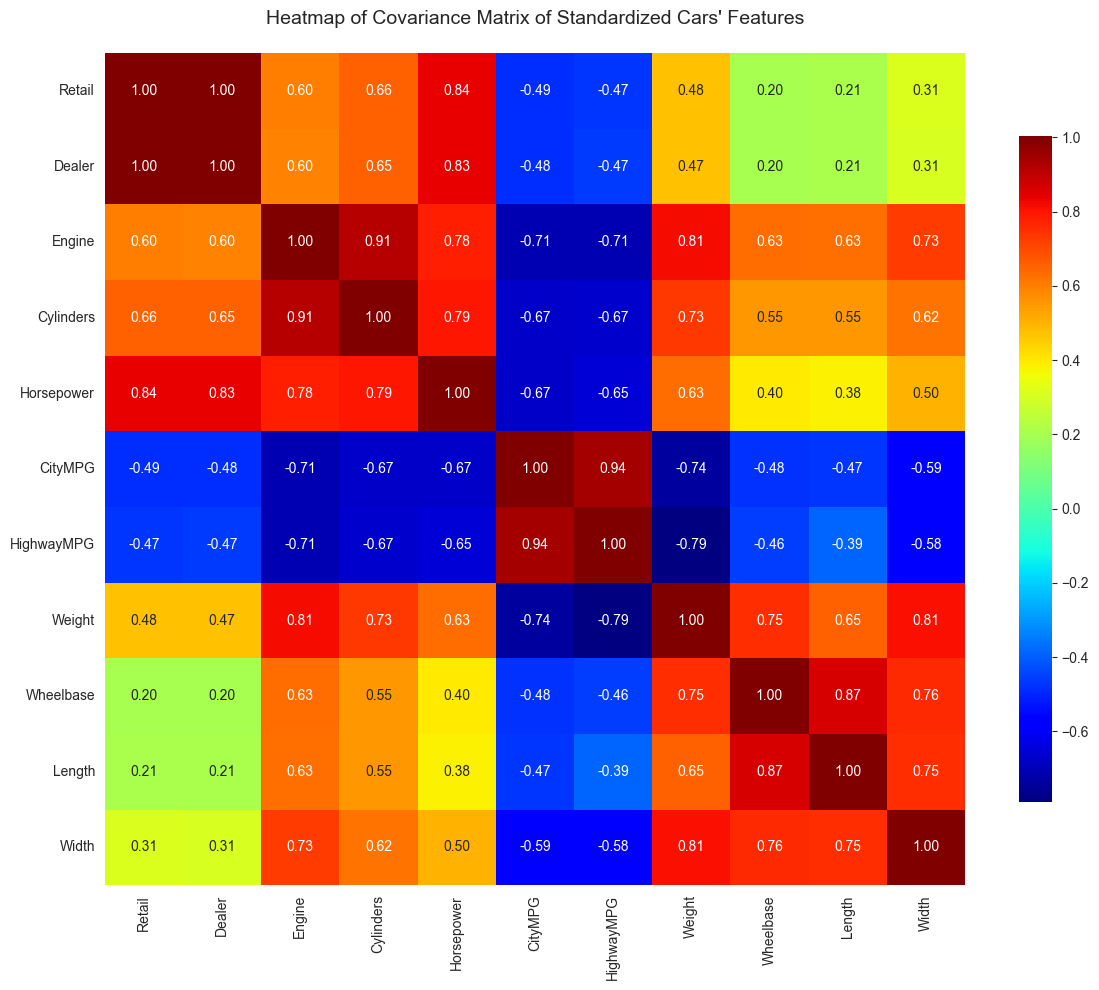

In [11]:
# Adjust the plot size for better readability
plt.figure(figsize=(12, 10))

# Create the heatmap with improved aesthetics
sns.heatmap(
    scaled_df.cov(),
    annot=True,
    fmt='.2f',
    cmap='jet',
    annot_kws={"size": 10},  # Adjust the font size of the annotations
    cbar_kws={"shrink": 0.8}  # Shrink the color bar for better fit
)

# Add a title with proper spacing
plt.title('Heatmap of Covariance Matrix of Standardized Cars\' Features\n', fontsize=14)

# Use a tight layout to prevent clipping
plt.tight_layout()

plt.show()


### Section c)

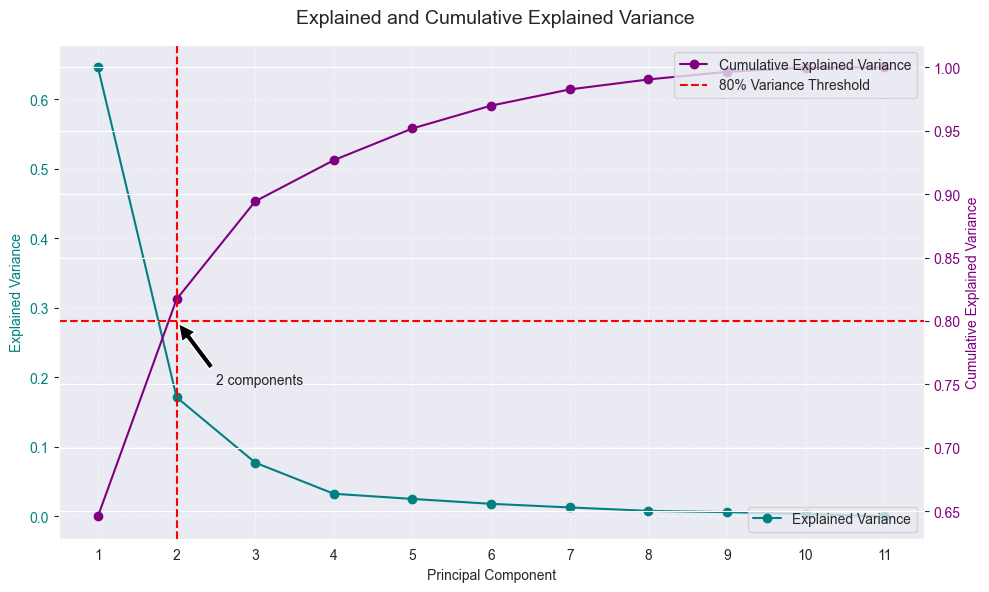

In [21]:
# Apply PCA
model = PCA()
model.fit(scaled_df)
# Assuming 'model.explained_variance_' is already defined
explained_variance = model.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)
components = np.arange(1, len(explained_variance) + 1)

# Create the figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot explained variance on the first y-axis
ax1.plot(components, explained_variance, marker='o', linestyle='-', color='teal', label='Explained Variance')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Explained Variance', color='teal')
ax1.tick_params(axis='y', labelcolor='teal')
ax1.set_xticks(components)
ax1.grid(True, linestyle='--', alpha=0.5)


# Create a second y-axis for cumulative explained variance
ax2 = ax1.twinx()
ax2.plot(components, cumulative_explained_variance, marker='o', linestyle='-', color='purple', label='Cumulative Explained Variance')
ax2.set_ylabel('Cumulative Explained Variance', color='purple')
ax2.tick_params(axis='y', labelcolor='purple')

# Annotate the point where cumulative variance exceeds 90%
threshold = 0.8 * cumulative_explained_variance[-1]
components_needed = np.argmax(cumulative_explained_variance >= threshold) + 1

ax2.axhline(y=threshold, color='red', linestyle='--', label=f'80% Variance Threshold')
ax2.axvline(x=components_needed, color='red', linestyle='--')
ax2.annotate(f'{components_needed} components', xy=(components_needed, threshold),
             xytext=(components_needed + 0.5, threshold - 0.05 * cumulative_explained_variance[-1]),
             arrowprops=dict(facecolor='black', shrink=0.05))

# Add titles and legends
fig.suptitle('Explained and Cumulative Explained Variance', fontsize=14)
ax1.legend(loc='lower right')
ax2.legend(loc='upper right')

# Display the plot
plt.tight_layout()
plt.show()


Here, we observe that at least two components are required to ensure that 80% of the dataset's variance is covered, highlighting the importance of retaining these components for adequate data representation.

# Section d)
Here I creat a 2D visualization of data projected onto the first two principal components (PC1 and PC2) using Principal Component Analysis (PCA). The scatterplot displays the transformed data points in the reduced 2D space, highlighting patterns and clusters based on the most significant directions of variance. Additionally, I overlay arrows to represent how the original features are projected into the PCA space, offering insights into the contributions of each feature to the principal components.

The data points are plotted using their first two principal component values, ensuring a clear representation of the most significant variance in the dataset. Each point is depicted as a small black circle, while the axes are scaled equally to preserve the proportions. For each feature, its direction in the original space is transformed into the PCA space and normalized to fit the 2D plane. The arrows point from the origin (0, 0) in the direction corresponding to each feature's influence on PC1 and PC2, scaled by an amplification factor for better visibility. Labels are added near the arrows for feature identification, with adjustments to prevent overlap where necessary.

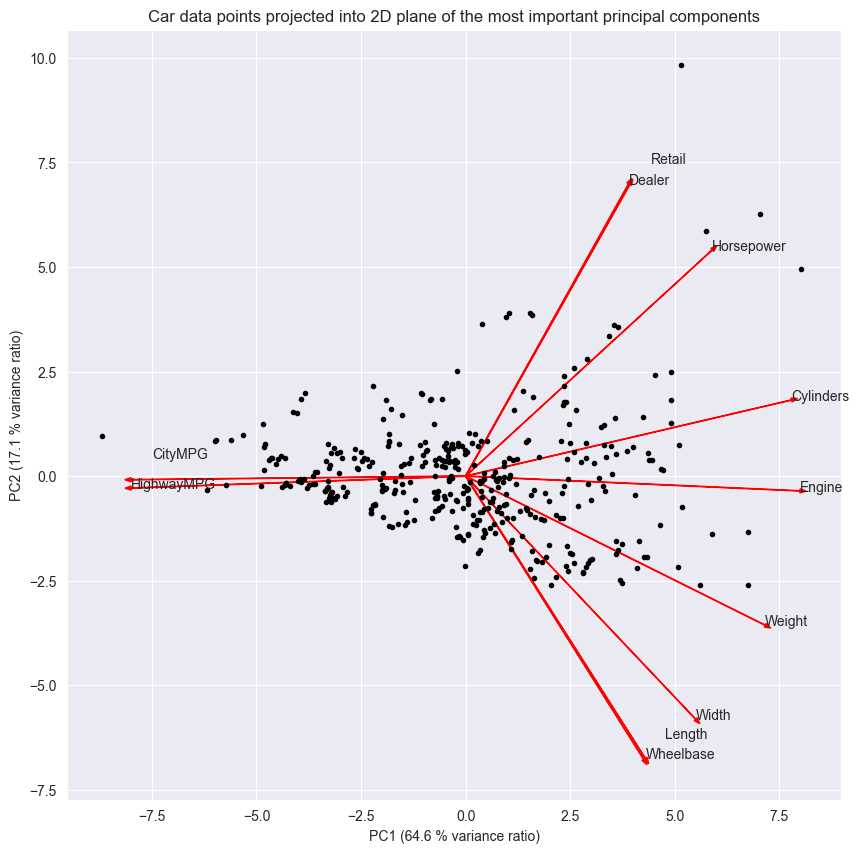

In [25]:
# creating the figure
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()
ax.set_aspect('equal')

# plotting the pc2 vs. pc1 of data points
ax.plot(x_new[:, 0], x_new[:, 1], marker = 'o', linestyle = '', color = 'k', markerfacecolor = 'k', markersize = 3)



# looping for different features to plot arrow corresponding to the projection of that feature into PC1 and PC2 plane
for index, feature in enumerate(scaled_df.columns):

    # unit vector in the initial space pointing into the corresponding feature 
    feature_dir = [[float(index == i) for i in range(11)]]

    # feature's direction in new coordinates (PCA coordinates)
    tranformed_feature_dir =  pca.transform(feature_dir)[0]

    # selecting the 2 components of feature's direction and normalizng it for 2D visualization
    normalized_tranformed_feature_dir_2d = tranformed_feature_dir[:2]/np.linalg.norm(tranformed_feature_dir[:2])


    # amplifing the directions arrows' size and plotting them 
    amplifier = 8
    dx, dy = amplifier* normalized_tranformed_feature_dir_2d
    ax.arrow(x=0, y=0, dx=dx , dy = dy, width = 0.01, head_width = 0.1, color = 'r')

    # because some feutures have overlap, we need to change the position their labels
    if feature in ['Retail', 'Length', 'CityMPG']:
        dx = dx + 0.5
        dy = dy + 0.5

    # plotting feuture label
    plt.text(x= dx , y= dy, s=feature)


# Adjusting figure labels and title
ax.set_title('Car data points projected into 2D plane of the most important principal components')
ax.set_xlabel('PC1 (' + str(np.round(pca.explained_variance_ratio_[0]*100, 1)) + ' % variance ratio)')
ax.set_ylabel('PC2 (' + str(np.round(pca.explained_variance_ratio_[1]*100, 1)) + ' % variance ratio)')
plt.show()

This plot illustrates how the original features contribute to the variance captured by the principal components. It is a valuable tool for understanding dimensionality reduction and interpreting the impact of features in a PCA-transformed dataset.
In order to do feature selection as I mentioned in section a we can choose one of the features CityMPG or HighwayMPG because they are highly correlated.